In [24]:
from scipy.integrate import solve_ivp
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from ode_solve import euler_integration

In [61]:

# Solution to be solved:
def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x]


def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -np.sin(x)]

# Stiff ode: system that describes the chemical reaction of Robertson
def F_eval( t, X ):
    x = X[0]
    y = X[1]
    z = X[2]
    
    res = [
        -0.04*x + 10**4 *y *z,
        0.04*x - 10**4*y*z - 3*10**7 * y**2,
        3*10**7 * y**2,
    ]
    return res

In [62]:
# Solution parameters
t0 = 0.
# tf = 5.
tf = 40.
# x = -1.0, y = 2.0
# y0 =[ -1.0, 2.0]

# y0 = [1.3, 0.0]
y0 = [1.0, 1.0, 1.0]


methods = [
    'RK45',
    'RK23',
    'DOP853',
    'Radau',
    'BDF',
    'LSODA'
]
nvals = 1000
dt = 1e-2
t_vec = np.arange(t0,tf,dt)

In [64]:
sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        t_eval = t_vec,
        rtol=1e-6,
        method=methods[0]
    )
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1436510
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.997e+01, 3.998e+01,
       3.999e+01])
 t_events: None
        y: array([[1.00000000e+00, 1.00454279e+00, 1.00454456e+00, ...,
        1.01217320e+00, 1.01217633e+00, 1.01217854e+00],
       [1.00000000e+00, 1.63381132e-06, 1.78250998e-06, ...,
        3.04229124e-06, 1.80854973e-06, 1.49148717e-06],
       [1.00000000e+00, 1.99545558e+00, 1.99545366e+00, ...,
        1.98782376e+00, 1.98782186e+00, 1.98781997e+00]])
 y_events: None

In [57]:
%timeit sol = solve_ivp( F_eval, [t0,tf], y0, t_eval = t_vec, rtol=1e-8, method=methods[0] )

29.8 ms ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
sols = []
solsPts = []
for method in methods:
    sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        method=method,
#         rtol = 1e-6,
    )
    sols.append(sol)
    sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        t_eval = t_vec,
        method=method,
#         rtol = 1e-6,
    )
    solsPts.append(sol)
# end for 

In [41]:
sols

[  message: 'The solver successfully reached the end of the integration interval.'
      nfev: 44
      njev: 0
       nlu: 0
       sol: None
    status: 0
   success: True
         t: array([0.        , 0.09275736, 0.96669567, 1.86682255, 2.86527281,
        3.82007392, 4.79799596, 5.        ])
  t_events: None
         y: array([[-1.        , -0.81045232,  1.07827081,  2.20473978,  1.50648527,
         -0.4787546 , -2.07906952, -2.20184222],
        [ 2.        ,  2.08402664,  1.95884414,  0.37230733, -1.65227073,
         -2.18406357, -0.82263408, -0.388777  ]])
  y_events: None,
   message: 'The solver successfully reached the end of the integration interval.'
      nfev: 83
      njev: 0
       nlu: 0
       sol: None
    status: 0
   success: True
         t: array([0.        , 0.01900702, 0.20907718, 0.43820494, 0.6673327 ,
        0.88256192, 1.15925056, 1.48417576, 1.7766475 , 2.00635388,
        2.23606026, 2.45064247, 2.72678254, 3.05136287, 3.34439417,
        3.57487987, 

<IPython.core.display.Javascript object>


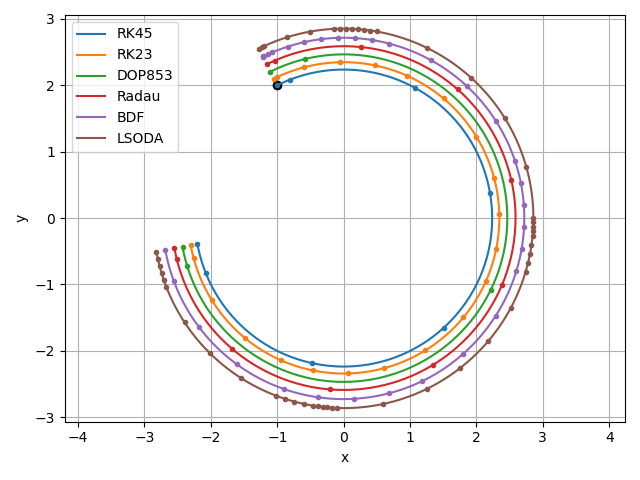

In [42]:
plt.figure()

plt.plot(y0[0],y0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
delt = 1.05
fact_mult = 1.0
for i in range(len(sols)):
    sol = solsPts[i]
    color = 'C%d'%(int(i))
    plt.plot(fact_mult*sol.y[0],fact_mult*sol.y[1],color,linewidth=1.5, label=methods[i])
    sol = sols[i]
    plt.plot(fact_mult*sol.y[0],fact_mult*sol.y[1],color+'.')
    # end for 1
    fact_mult *= delt
# end for

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()



In [43]:

dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, y0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler


array([[-1.        ,  2.        ,  0.        ],
       [-0.97995034,  2.00989984,  0.01      ],
       [-0.95980268,  2.0195987 ,  0.02      ],
       ...,
       [-2.19324443, -0.43554995,  4.98      ],
       [-2.19749021, -0.4135961 ,  4.99      ],
       [-2.20151624, -0.39160088,  5.        ]])

<IPython.core.display.Javascript object>


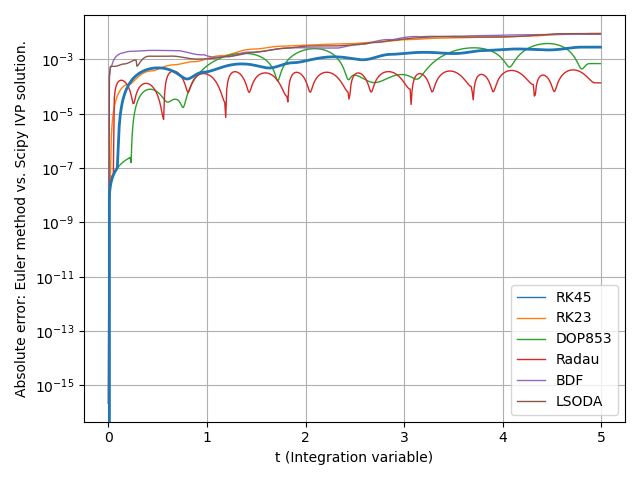

In [44]:
# Plot error values1e-6
plt.figure()

symbols = [".","o","|","s",">","<","x"]
# for i in range(1,order +1,2):
for i in range(len(sols)):

    sol = solsPts[i]
#     x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(sol.y.T - x_vals_euler[:-1,:2],axis=1)

    color = 'C%d'%(int(i))

    plt.semilogy(sol.t,err,color,linewidth=1.0, label=methods[i])
#     for j in range(len(sol)):
#         plt.semilogy([sol[j][2],sol[j][2]],[1e-9,1e-5],'k',linewidth=1.0)
        

# end for

i=0
sol = solsPts[i]
err = np.linalg.norm(sol.y.T - x_vals_euler[:-1,:2],axis=1)
color = 'C%d'%(int(i))
plt.semilogy(sol.t,err,color,linewidth=2)


plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error: Euler method vs. Scipy IVP solution.")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()

In [28]:
sol.t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.